## Importing data

As always, in order to work with data in python, we need a library that will let us handle "data exploration." We looked at geopandas last week, but let's go to its origin, the one and only, `pandas` library.

* https://pandas.pydata.org/

In [1]:
import pandas as pd
import numpy as np

Next, we make the call to load and read the data that was downloaded from social explorer. Again, take note at the relative path reference to find the file in your file directory.

In [2]:
pip install contextily

  Using cached contextily-1.2.0-py3-none-any.whl (16 kB)
  Using cached geopy-2.3.0-py3-none-any.whl (119 kB)
  Using cached mercantile-1.2.1-py3-none-any.whl (14 kB)
  Using cached xyzservices-2022.9.0-py3-none-any.whl (55 kB)
  Using cached rasterio-1.3.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (20.9 MB)
  Using cached geographiclib-2.0-py3-none-any.whl (40 kB)
  Using cached snuggs-1.4.7-py3-none-any.whl (5.4 kB)
  Using cached affine-2.3.1-py2.py3-none-any.whl (16 kB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
  Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
current_directory = os.getcwd()
print(current_directory)

/home/jovyan/22W-UP206A/Weeks/Week03


In [4]:
os.chdir('/home/jovyan/22W-UP206A/Weeks/Week03')

In [5]:
# load a data file
# note the relative filepath! where is this file located?
df = pd.read_csv('data/Exp_Sens_Adapt.csv')

In [6]:
# for plotting
import matplotlib.pyplot as plt

# for basemaps
import contextily as ctx

## Preliminary inspection
A quick look at the size of the data.

In [7]:
df.shape

(199, 10)

In [8]:
df.head()

,Census tract name,Geo_ID,FIPS,Population,HVIExposure,HVISensitivity,HVIAdaptiveCapacity,AQVIExposure,AQVISensitivity,AQVIAdaptiveCapacity
0,1.00,6019000100,6019000100,3676,2.5714,3.1667,2.7778,3.3333,3.1667,2.8889
1,2.00,6019000200,6019000200,2689,4.1429,4.8333,4.3333,4.1111,4.8333,4.2222
2,3.00,6019000300,6019000300,4225,3.7143,4.8333,4.0000,3.7778,4.8333,3.8889
3,4.00,6019000400,6019000400,5498,4.1429,4.3333,4.0000,4.3333,4.3333,4.0000
4,5.01,6019000501,6019000501,2532,4.0000,3.6667,4.7778,3.8889,3.6667,4.5556


## Overwriting default display settings 
By default, pandas outputs the first 10 and last 10 columns. If we want to see the entire table, we can override the defaults. Use with caution!

In [9]:
# I want to see all the data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [10]:
df.sample()

,Census tract name,Geo_ID,FIPS,Population,HVIExposure,HVISensitivity,HVIAdaptiveCapacity,AQVIExposure,AQVISensitivity,AQVIAdaptiveCapacity
24,14.13,6019001413,6019001413,6823,3.5714,3.1667,3.1111,3.5556,3.1667,3.1111


## Data types

To get the data types, we will use `.info()`. Notice the new arguments within: `verbose=True, null_counts=True`. This is necessary because our data has so many columns.

In [11]:
# look at the data types
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Census tract name      199 non-null    float64
 1   Geo_ID                 199 non-null    int64  
 2   FIPS                   199 non-null    int64  
 3   Population             199 non-null    int64  
 4   HVIExposure            199 non-null    float64
 5   HVISensitivity         199 non-null    float64
 6   HVIAdaptiveCapacity    199 non-null    float64
 7   AQVIExposure           199 non-null    float64
 8   AQVISensitivity        199 non-null    float64
 9   AQVIAdaptiveCapacity   199 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 15.7 KB


/tmp/ipykernel_168/175451509.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


## Assigning data types on import

Let's take a closer look at the column that will become our unique identifier, `Geo_FIPS`.

In [12]:
df.FIPS.head()

0    6019000100
1    6019000200
2    6019000300
3    6019000400
4    6019000501
Name: FIPS, dtype: int64

### The leading zero dilemma...
Waaaaaiiit... what happened to the leading "0" in the `Geo_FIPS` code? And for that matter, the `geo_STATE` and `geo_COUNTY` columns?

In [13]:
df.AQVIExposure.head()

0    3.3333
1    4.1111
2    3.7778
3    4.3333
4    3.8889
Name: AQVIExposure, dtype: float64

In [14]:
df.FIPS.head()

0    6019000100
1    6019000200
2    6019000300
3    6019000400
4    6019000501
Name: FIPS, dtype: int64

In [15]:
df.Geo_ID.head()

0    6019000100
1    6019000200
2    6019000300
3    6019000400
4    6019000501
Name: Geo_ID, dtype: int64

### The FIPS code
But what is a FIPS code and why is it important?

![fips](images/fips.png)

That's right, python automatically makes decisions on import, and interprets "FIPS" as an integer column (after all, it's all numbers aren't they), thus cropping the leading zeroes. But no, that [leading zero](https://en.wikipedia.org/wiki/Leading_zero) is extremely important, as `06` represents the state of California, and `037` represents LA County. 

Let's fix this by re-importing the data, this time, specifying the `FIPS` columns as a string:

In [16]:
df = pd.read_csv(
    'data/Exp_Sens_Adapt.csv',
    dtype=
    {
        'Geo_ID':str,
        'FIPS':str,
    }
)

In [17]:
#df['Geo_ID'] = df['Geo_ID'].astype("str")

In [18]:
#df['FIPS'] = df['FIPS'].astype("str")

In [19]:
df['HVIExposure'].astype(pd.np.int64)

/tmp/ipykernel_168/2598260885.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df['HVIExposure'].astype(pd.np.int64)


0      2
1      4
2      3
3      4
4      4
5      3
6      3
7      4
8      3
9      4
10     4
11     4
12     4
13     4
14     4
15     3
16     4
17     3
18     3
19     2
20     3
21     3
22     3
23     3
24     3
25     3
26     3
27     3
28     3
29     4
30     4
31     4
32     3
33     3
34     3
35     3
36     3
37     4
38     4
39     3
40     4
41     4
42     4
43     4
44     3
45     3
46     3
47     3
48     3
49     3
50     3
51     3
52     3
53     3
54     3
55     4
56     4
57     3
58     3
59     3
60     3
61     3
62     4
63     3
64     4
65     4
66     3
67     3
68     3
69     4
70     3
71     3
72     3
73     4
74     3
75     3
76     3
77     3
78     3
79     3
80     3
81     3
82     3
83     3
84     3
85     3
86     3
87     3
88     3
89     3
90     3
91     3
92     3
93     3
94     3
95     3
96     3
97     3
98     3
99     3
100    4
101    4
102    3
103    3
104    3
105    3
106    3
107    3
108    3
109    3
110    3
1

In [20]:
df['HVISensitivity'].astype(pd.np.int64)

/tmp/ipykernel_168/138056442.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df['HVISensitivity'].astype(pd.np.int64)


0      3
1      4
2      4
3      4
4      3
5      4
6      4
7      4
8      4
9      4
10     5
11     5
12     4
13     3
14     4
15     4
16     4
17     3
18     3
19     4
20     3
21     3
22     3
23     3
24     3
25     3
26     4
27     3
28     3
29     3
30     4
31     3
32     4
33     3
34     3
35     4
36     3
37     4
38     4
39     4
40     4
41     4
42     4
43     3
44     3
45     4
46     3
47     3
48     4
49     4
50     3
51     3
52     3
53     3
54     4
55     4
56     4
57     4
58     3
59     3
60     4
61     4
62     3
63     3
64     3
65     4
66     3
67     4
68     3
69     3
70     3
71     3
72     3
73     3
74     3
75     2
76     3
77     3
78     3
79     2
80     2
81     3
82     3
83     2
84     3
85     3
86     3
87     3
88     2
89     2
90     3
91     2
92     3
93     3
94     3
95     3
96     3
97     4
98     3
99     4
100    3
101    4
102    3
103    3
104    3
105    4
106    4
107    4
108    4
109    3
110    3
1

In [21]:
df['HVIAdaptiveCapacity '].astype(pd.np.int64)

/tmp/ipykernel_168/4159367713.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df['HVIAdaptiveCapacity '].astype(pd.np.int64)


0      2
1      4
2      4
3      4
4      4
5      4
6      4
7      4
8      3
9      4
10     4
11     4
12     4
13     4
14     4
15     4
16     4
17     4
18     4
19     4
20     3
21     3
22     3
23     3
24     3
25     3
26     3
27     3
28     3
29     3
30     3
31     3
32     3
33     3
34     4
35     4
36     4
37     4
38     4
39     3
40     4
41     4
42     4
43     4
44     3
45     4
46     4
47     4
48     4
49     3
50     3
51     3
52     3
53     3
54     4
55     3
56     4
57     4
58     3
59     2
60     3
61     3
62     3
63     3
64     3
65     3
66     3
67     3
68     3
69     3
70     3
71     3
72     3
73     3
74     3
75     2
76     3
77     3
78     3
79     2
80     3
81     2
82     3
83     2
84     2
85     2
86     3
87     2
88     2
89     2
90     3
91     3
92     3
93     3
94     2
95     3
96     2
97     3
98     3
99     4
100    4
101    4
102    3
103    3
104    3
105    3
106    3
107    3
108    3
109    3
110    3
1

In [22]:
df['AQVIExposure'].astype(pd.np.int64)

/tmp/ipykernel_168/763928035.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df['AQVIExposure'].astype(pd.np.int64)


0      3
1      4
2      3
3      4
4      3
5      4
6      3
7      3
8      2
9      3
10     3
11     3
12     4
13     4
14     4
15     3
16     3
17     3
18     3
19     3
20     3
21     4
22     3
23     3
24     3
25     3
26     4
27     3
28     4
29     3
30     3
31     4
32     3
33     3
34     3
35     4
36     3
37     4
38     3
39     3
40     3
41     3
42     4
43     3
44     3
45     3
46     3
47     4
48     3
49     3
50     3
51     3
52     3
53     4
54     3
55     3
56     3
57     4
58     3
59     3
60     3
61     3
62     3
63     3
64     4
65     3
66     3
67     3
68     3
69     3
70     3
71     3
72     2
73     3
74     3
75     3
76     3
77     3
78     3
79     3
80     3
81     3
82     3
83     3
84     3
85     3
86     3
87     3
88     3
89     3
90     3
91     3
92     4
93     3
94     3
95     3
96     3
97     3
98     3
99     3
100    3
101    3
102    3
103    3
104    3
105    3
106    3
107    3
108    3
109    3
110    3
1

In [23]:
df['AQVISensitivity'].astype(pd.np.int64)

/tmp/ipykernel_168/1492263287.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df['AQVISensitivity'].astype(pd.np.int64)


0      3
1      4
2      4
3      4
4      3
5      4
6      4
7      4
8      4
9      4
10     5
11     5
12     4
13     3
14     4
15     4
16     4
17     3
18     3
19     4
20     3
21     3
22     3
23     3
24     3
25     3
26     4
27     3
28     3
29     3
30     4
31     3
32     4
33     3
34     3
35     4
36     3
37     4
38     4
39     4
40     4
41     4
42     4
43     3
44     3
45     4
46     3
47     3
48     4
49     4
50     3
51     3
52     3
53     3
54     4
55     4
56     4
57     4
58     3
59     3
60     4
61     4
62     3
63     3
64     3
65     4
66     3
67     4
68     3
69     3
70     3
71     3
72     3
73     3
74     3
75     2
76     3
77     3
78     3
79     2
80     2
81     3
82     3
83     2
84     3
85     3
86     3
87     3
88     2
89     2
90     3
91     2
92     3
93     3
94     3
95     3
96     3
97     4
98     3
99     4
100    3
101    4
102    3
103    3
104    3
105    4
106    4
107    4
108    4
109    3
110    3
1

In [24]:
df['AQVIAdaptiveCapacity '].astype(pd.np.int64)

/tmp/ipykernel_168/1167358749.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df['AQVIAdaptiveCapacity '].astype(pd.np.int64)


0      2
1      4
2      3
3      4
4      4
5      4
6      4
7      4
8      3
9      4
10     4
11     4
12     4
13     4
14     4
15     4
16     4
17     4
18     4
19     4
20     3
21     3
22     3
23     3
24     3
25     3
26     3
27     3
28     3
29     3
30     3
31     3
32     3
33     3
34     4
35     4
36     4
37     4
38     4
39     3
40     4
41     4
42     4
43     4
44     3
45     4
46     4
47     3
48     4
49     3
50     3
51     3
52     3
53     3
54     3
55     3
56     4
57     4
58     3
59     2
60     3
61     3
62     3
63     3
64     3
65     3
66     3
67     3
68     3
69     3
70     3
71     3
72     3
73     3
74     3
75     3
76     3
77     3
78     3
79     2
80     3
81     3
82     3
83     2
84     2
85     2
86     3
87     2
88     2
89     2
90     3
91     3
92     3
93     3
94     2
95     3
96     2
97     3
98     3
99     4
100    3
101    3
102    3
103    3
104    3
105    3
106    3
107    3
108    3
109    3
110    3
1

In [25]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Census tract name      199 non-null    float64
 1   Geo_ID                 199 non-null    object 
 2   FIPS                   199 non-null    object 
 3   Population             199 non-null    int64  
 4   HVIExposure            199 non-null    float64
 5   HVISensitivity         199 non-null    float64
 6   HVIAdaptiveCapacity    199 non-null    float64
 7   AQVIExposure           199 non-null    float64
 8   AQVISensitivity        199 non-null    float64
 9   AQVIAdaptiveCapacity   199 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 15.7+ KB


/tmp/ipykernel_168/2612161665.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


In [26]:
# now look at the data again
df.head()

,Census tract name,Geo_ID,FIPS,Population,HVIExposure,HVISensitivity,HVIAdaptiveCapacity,AQVIExposure,AQVISensitivity,AQVIAdaptiveCapacity
0,1.00,6019000100,06019000100,3676,2.5714,3.1667,2.7778,3.3333,3.1667,2.8889
1,2.00,6019000200,06019000200,2689,4.1429,4.8333,4.3333,4.1111,4.8333,4.2222
2,3.00,6019000300,06019000300,4225,3.7143,4.8333,4.0000,3.7778,4.8333,3.8889
3,4.00,6019000400,06019000400,5498,4.1429,4.3333,4.0000,4.3333,4.3333,4.0000
4,5.01,6019000501,06019000501,2532,4.0000,3.6667,4.7778,3.8889,3.6667,4.5556


Confirm that your new dataframe has the correct datatypes.

In [ ]:
#df.info(verbose=True, null_counts=True)

<div class="alert alert-danger">
    
The [leading zero dilemma](https://en.wikipedia.org/wiki/Leading_zero) is a known enigma in GIS and data integration. Even ESRI has yet to find a clean solution to this problem, forcing users into resorting to [weird hacks](https://support.esri.com/en/technical-article/000013035) to circumvent this problem. Python and pandas actually gives us a "clean-ish" solution that makes logical sense... doesn't it?
    
</div>

## Drop/Delete null columns
By default, social explorer creates many columns. Many of them have null values from top to bottom. What are the null columns? You can find out using the handy `isna()` command. Notice the chain of commands.

[isna().all()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html)

The `.all()` indicates that you want to find the columns that have ALL empty values. The other option would be `.any()` which would list all columns that have *at least one* empty value. 

In [27]:
df.columns[df.isna().all()].tolist()

[]

Let's eliminate these. There is a handy pandas command to do so `.dropna()`. The arguments are `axis=1` which indicates you want to eliminate *columns* (`axis=0` would eliminate rows), and `how="all"` to remove columns where all values are empty.

* [dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

In [28]:
df = df.dropna(axis=1,how="all")

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Census tract name      199 non-null    float64
 1   Geo_ID                 199 non-null    object 
 2   FIPS                   199 non-null    object 
 3   Population             199 non-null    int64  
 4   HVIExposure            199 non-null    float64
 5   HVISensitivity         199 non-null    float64
 6   HVIAdaptiveCapacity    199 non-null    float64
 7   AQVIExposure           199 non-null    float64
 8   AQVISensitivity        199 non-null    float64
 9   AQVIAdaptiveCapacity   199 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 15.7+ KB


In [30]:
# reinspect the data
df.head()

,Census tract name,Geo_ID,FIPS,Population,HVIExposure,HVISensitivity,HVIAdaptiveCapacity,AQVIExposure,AQVISensitivity,AQVIAdaptiveCapacity
0,1.00,6019000100,06019000100,3676,2.5714,3.1667,2.7778,3.3333,3.1667,2.8889
1,2.00,6019000200,06019000200,2689,4.1429,4.8333,4.3333,4.1111,4.8333,4.2222
2,3.00,6019000300,06019000300,4225,3.7143,4.8333,4.0000,3.7778,4.8333,3.8889
3,4.00,6019000400,06019000400,5498,4.1429,4.3333,4.0000,4.3333,4.3333,4.0000
4,5.01,6019000501,06019000501,2532,4.0000,3.6667,4.7778,3.8889,3.6667,4.5556


## Dropping columns by name
We dropped the columns with empty values. There are still columns that we do not need, so let's eliminate those as well. First, create a list of column names that we want to drop.

In [ ]:
# list of additional columns to drop
#columns_to_drop = ['Geo_GEOID','Geo_STUSAB','Geo_SUMLEV','Geo_GEOCOMP','Geo_FILEID','Geo_LOGRECNO']

In [ ]:
# next, drop them!
#df = df.drop(columns_to_drop,axis=1)
#df.head()

## The census data dictionary
What are these columns? Column headers are defined in the data dictionary text file downloaded from social explorer. For your reference, it has been uploaded to the data directory in this folder.
* [data dictionary](data/se_la_race_dict.txt)

## Renaming columns

Let's rename the columns. First, create a list of column names as they are now.

In [31]:
columns = list(df) # this is the same as df.columns.to_list()
columns

['Census tract name',
 'Geo_ID',
 'FIPS',
 'Population',
 'HVIExposure',
 'HVISensitivity',
 'HVIAdaptiveCapacity ',
 'AQVIExposure',
 'AQVISensitivity',
 'AQVIAdaptiveCapacity ']

Then, simply copy and paste the output list above, and define the columns with it. Replace the values with your desired column names

In [32]:
df.columns = ['Tract',
 'Geo_ID',
 'FIPS',
 'Population',
 'HVIExposure',
 'HVISense',
 'HVIAC',
 'AQVIExposure',
 'AQVISense',
 'AQVIAC']

In [33]:
df.head()

,Tract,Geo_ID,FIPS,Population,HVIExposure,HVISense,HVIAC,AQVIExposure,AQVISense,AQVIAC
0,1.00,6019000100,06019000100,3676,2.5714,3.1667,2.7778,3.3333,3.1667,2.8889
1,2.00,6019000200,06019000200,2689,4.1429,4.8333,4.3333,4.1111,4.8333,4.2222
2,3.00,6019000300,06019000300,4225,3.7143,4.8333,4.0000,3.7778,4.8333,3.8889
3,4.00,6019000400,06019000400,5498,4.1429,4.3333,4.0000,4.3333,4.3333,4.0000
4,5.01,6019000501,06019000501,2532,4.0000,3.6667,4.7778,3.8889,3.6667,4.5556


## Simple stats and plots

In [34]:
# access a single column like df['col_name']
df['AQVIAC'].head()

0    2.8889
1    4.2222
2    3.8889
3    4.0000
4    4.5556
Name: AQVIAC, dtype: float64

In [ ]:
# What is the mean?
#df['DieselPM'].mean()

In [35]:
# get some stats
df['AQVIAC'].describe()

count    199.000000
mean       3.463987
std        0.524662
min        2.333300
25%        3.000000
50%        3.444400
75%        3.888900
max        4.555600
Name: AQVIAC, dtype: float64

<AxesSubplot:ylabel='Frequency'>

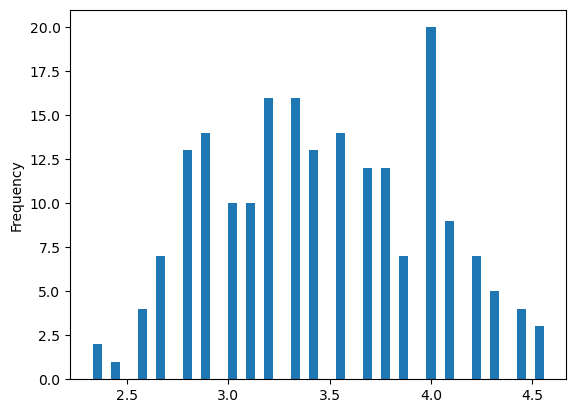

In [36]:
# plot it as a historgram with 50 bins
df['AQVIAC'].plot.hist(bins=50)

<div class="alert alert-info">
    Now it's your turn. Find some stats for different fields in the data and output them below.
    </div>

In [ ]:
#df['Toxic'].describe()

## Displaying null/missing values
Earlier, we eliminated columns where *all* values were null. However, there may still exist null values in individual cells throughout the table. Null values, or empty values, can be problematic in many ways. It is always good practice to scrutinize your data for missing values, and to identify where they are and why. The following arguments are simple calls to the data to find where these null values are.

In [37]:
# first double check how many rows we have
len(df)

199

In [38]:
# null values in the data for a all columns
df.isna().sum()

Tract           0
Geo_ID          0
FIPS            0
Population      0
HVIExposure     0
HVISense        0
HVIAC           0
AQVIExposure    0
AQVISense       0
AQVIAC          0
dtype: int64

Which rows have null values, and how many? Let's output these rows.

In [ ]:
# show rows with null columns
df[df['NoCanopy'].isnull()]

Why do these rows have null values?

## Sorting
What are the top 10 most populated census tracts? What are the census tracts with the highest black popluation? To answer these questions, the simplest method is to sort the data by their respective columns.

In [39]:
df_sorted = df.sort_values(by='AQVIAC',ascending = False)

In [41]:
# display the data, but just a few columns to keep it clean
df_sorted[['Tract','AQVIAC']].head(10)

,Tract,AQVIAC
35,24.00,4.5556
4,5.01,4.5556
187,78.02,4.5556
12,11.00,4.4444
160,62.01,4.4444
37,25.02,4.4444
42,28.00,4.4444
11,10.00,4.3333
16,13.03,4.3333
168,65.02,4.3333


<AxesSubplot:xlabel='Tract'>

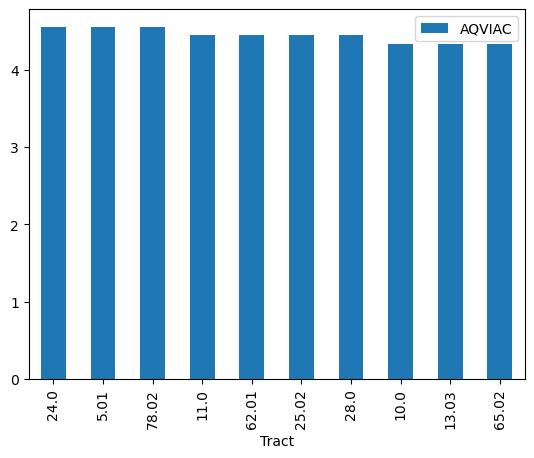

In [42]:
# plot it
df_sorted.head(10).plot.bar(x='Tract',
                            y='AQVIAC')

<AxesSubplot:title={'center':'Top 10 Census Tracts with Adaptive Capacity'}, xlabel='Tract'>

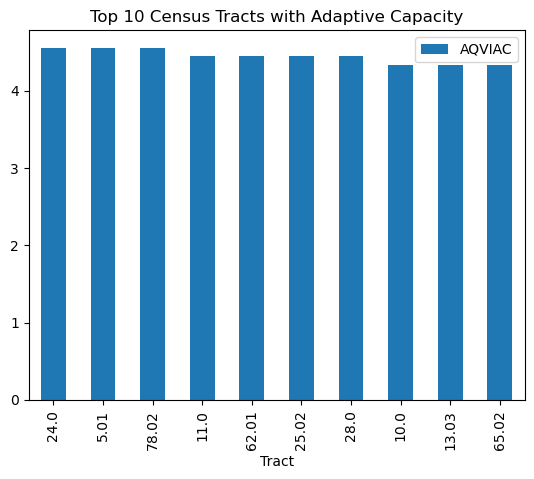

In [43]:
# Make it prettier with a title
df_sorted.head(10).plot.bar(x='Tract',
                            y='AQVIAC', 
                            title='Top 10 Census Tracts with Adaptive Capacity')

<div class="alert alert-info">
    Now it's your turn! Create a table and accompanying bar plot for the top 10 values for column of your choice
</div>

In [ ]:
df_sorted = df.sort_values(by='WeightedAQVI',ascending = False)
df_sorted[['CensusTract','WeightedAQVI']].head(10)
df_sorted.head(10).plot.bar(x='CensusTract',
                            y='WeightedAQVI', 
                            title='Top 10 Census Tracts with Highest AQVI in Fresno County')

## Filtering and subsetting data
Sorting is one method, but the process of discovery compels us to interrogate the data in different ways. One method of doing so is to query, or filter the data to see specific views of the data based on a question you may have. For example, what are the census tract that have no people in them? Or, Which census tracts are more than 75% black?

In [ ]:
# subset the data so that we can see the data per row... 
# in other words, this syntax is asking to "show me the values in my dataframe that match this filter
df[df['WeightedAQVI']==0]

Note that unless you specify the resulting output as a new variable, the results are only temporary (in memory). If you want to use the results for subsequent analysis, you need to create a new variable.

In [ ]:
# create a new variable for census tracts with zero pop
df_WeightedAQVI_hi = df[df['WeightedAQVI']>=12]

In [ ]:
# how many records?
print('There are ' + str(len(df_WeightedAQVI_hi)) + ' census tracts with an AQVI greater than 12')

In [ ]:
# display it
df_WeightedAQVI_hi[['CensusTract','WeightedAQVI']]

<div class="alert alert-info">
    Now it's your turn! Find out how many census tracts are 75% or more Black, and output them in a table.
    <br>
    <br>
    Extra points if you can show only relevant columns, and sort them from highest to lowest!
</div>

In [ ]:
df[df['NoCanopy']>=.97]
df_NoCanopy_hi = df[df['NoCanopy']>=.97]
df_NoCanopy_hi[['CensusTract','NoCanopy']] 

# Maps!

## Geopandas to read geojson
Last week, we learned how to read a shapefile using geopandas. Geopandas can read other spatial file formats, so let's try it with the popular [geojson format](https://geojson.org/).

* Data from the LA Times [Mapping LA Boundaries](http://boundaries.latimes.com/sets/)

In [44]:
>>> import sys
>>> 'geopandas' in sys.modules

False

In [45]:
pip install geopandas

  Using cached geopandas-0.12.1-py3-none-any.whl (1.1 MB)
  Using cached Shapely-1.8.5.post1-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (2.0 MB)
  Using cached pyproj-3.4.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (7.7 MB)
  Using cached Fiona-1.8.22-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.6 MB)
  Using cached munch-2.5.0-py2.py3-none-any.whl (10 kB)
Note: you may need to restart the kernel to use updated packages.


In [46]:
import geopandas as gpd

In [47]:
# read in a geojson file downloaded from the LA Times
tracts=gpd.read_file('data/Census_2010_Tracts.geojson')
tracts.head()

,ObjectID,ID,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,LayerRefreshDate,SHAPE_Length,SHAPE_Area,geometry
0,1,3050.0,06,019,002800,06019002800,28,Census Tract 28,G5020,S,2639330.0,0.0,+36.7577993,-119.7453702,2021-07-26 14:13:50+00:00,0.065850,0.000266,"MULTIPOLYGON (((-119.75452 36.76512, -119.7528..."
1,2,2915.0,06,019,002701,06019002701,27.01,Census Tract 27.01,G5020,S,1300767.0,0.0,+36.7468158,-119.7453946,2021-07-26 14:13:50+00:00,0.050690,0.000131,"MULTIPOLYGON (((-119.73636 36.75045, -119.7363..."
2,3,2914.0,06,019,002702,06019002702,27.02,Census Tract 27.02,G5020,S,1307780.0,0.0,+36.7395320,-119.7453861,2021-07-26 14:13:50+00:00,0.051702,0.000132,"MULTIPOLYGON (((-119.73638 36.74319, -119.7363..."
3,4,2847.0,06,019,005000,06019005000,50,Census Tract 50,G5020,S,2590521.0,0.0,+36.8012804,-119.7904326,2021-07-26 14:13:50+00:00,0.065200,0.000262,"MULTIPOLYGON (((-119.79955 36.79401, -119.7995..."
4,5,3012.0,06,019,005405,06019005405,54.05,Census Tract 54.05,G5020,S,1933450.0,0.0,+36.8266460,-119.7677223,2021-07-26 14:13:50+00:00,0.069132,0.000195,"MULTIPOLYGON (((-119.78133 36.82298, -119.7813..."


In [48]:
# tell me more about this dataset
tracts.info(verbose=True, null_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   ObjectID          199 non-null    int64              
 1   ID                199 non-null    float64            
 2   STATEFP10         199 non-null    object             
 3   COUNTYFP10        199 non-null    object             
 4   TRACTCE10         199 non-null    object             
 5   GEOID10           199 non-null    object             
 6   NAME10            199 non-null    object             
 7   NAMELSAD10        199 non-null    object             
 8   MTFCC10           199 non-null    object             
 9   FUNCSTAT10        199 non-null    object             
 10  ALAND10           199 non-null    float64            
 11  AWATER10          199 non-null    float64            
 12  INTPTLAT10        199 non-null    object             
 1

/tmp/ipykernel_168/4166793285.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  tracts.info(verbose=True, null_counts=True)


In [49]:
# we only really need FIPS and geometry, so let's subset the data
tracts = tracts[['GEOID10','geometry']]
tracts.head()

,GEOID10,geometry
0,06019002800,"MULTIPOLYGON (((-119.75452 36.76512, -119.7528..."
1,06019002701,"MULTIPOLYGON (((-119.73636 36.75045, -119.7363..."
2,06019002702,"MULTIPOLYGON (((-119.73638 36.74319, -119.7363..."
3,06019005000,"MULTIPOLYGON (((-119.79955 36.79401, -119.7995..."
4,06019005405,"MULTIPOLYGON (((-119.78133 36.82298, -119.7813..."


In [50]:
# rename the columns
tracts.columns = ['FIPS','geometry']

In [51]:
tracts.head()

,FIPS,geometry
0,06019002800,"MULTIPOLYGON (((-119.75452 36.76512, -119.7528..."
1,06019002701,"MULTIPOLYGON (((-119.73636 36.75045, -119.7363..."
2,06019002702,"MULTIPOLYGON (((-119.73638 36.74319, -119.7363..."
3,06019005000,"MULTIPOLYGON (((-119.79955 36.79401, -119.7995..."
4,06019005405,"MULTIPOLYGON (((-119.78133 36.82298, -119.7813..."


<AxesSubplot:>

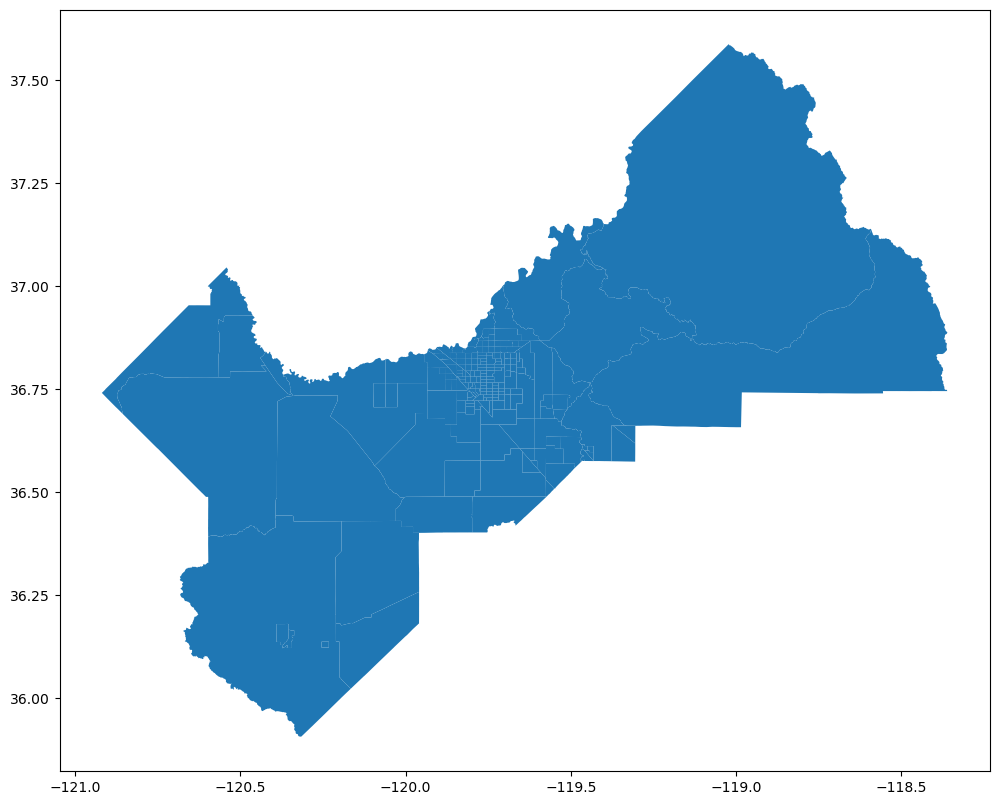

In [52]:
tracts.plot(figsize=(12,10))

<div class="alert alert-danger">
    
Remember the leading zero dilemma? This is why it is important to make sure our data types align. FIPS codes must be used as strings in order for them to join correctly.
    
</div>

In [53]:
# create a new dataframe based on the join
tracts_AQVI=tracts.merge(df,on="FIPS")

In [54]:
# what does it look like now?
tracts_AQVI.head()

,FIPS,geometry,Tract,Geo_ID,Population,HVIExposure,HVISense,HVIAC,AQVIExposure,AQVISense,AQVIAC
0,06019002800,"MULTIPOLYGON (((-119.75452 36.76512, -119.7528...",28.00,6019002800,4435,4.1429,4.0000,4.5556,4.0000,4.0000,4.4444
1,06019002701,"MULTIPOLYGON (((-119.73636 36.75045, -119.7363...",27.01,6019002701,4209,4.0000,4.1667,4.0000,3.5556,4.1667,4.0000
2,06019002702,"MULTIPOLYGON (((-119.73638 36.74319, -119.7363...",27.02,6019002702,4891,4.2857,4.1667,4.2222,3.5556,4.1667,4.1111
3,06019005000,"MULTIPOLYGON (((-119.79955 36.79401, -119.7995...",50.00,6019005000,4548,3.5714,3.6667,3.2222,3.7778,3.6667,3.2222
4,06019005405,"MULTIPOLYGON (((-119.78133 36.82298, -119.7813...",54.05,6019005405,4693,3.2857,3.3333,3.1111,3.5556,3.3333,3.1111


We can now create choropleth maps in geopandas. 

* [geopandas choropleth maps](https://geopandas.org/mapping.html#choropleth-maps)
* [color schemes](https://geopandas.org/mapping.html#choosing-colors)
  * `natural_breaks`
  * `equal_interval`
  * `quantiles`

In [55]:
pip install mapclassify

  Using cached mapclassify-2.4.3-py3-none-any.whl (38 kB)
Note: you may need to restart the kernel to use updated packages.


In [57]:
import mapclassify

<AxesSubplot:>

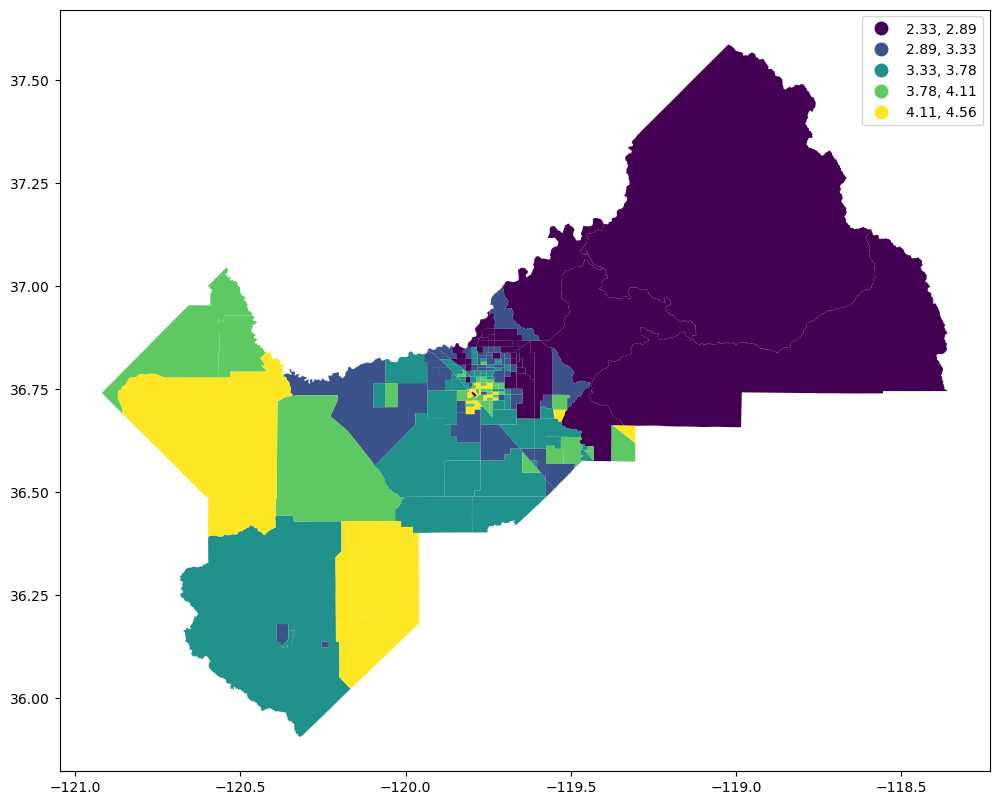

In [56]:
tracts_AQVI.plot(figsize=(12,10),
                 column='AQVIAC',
                 legend=True, 
                 scheme='NaturalBreaks')

<AxesSubplot:>

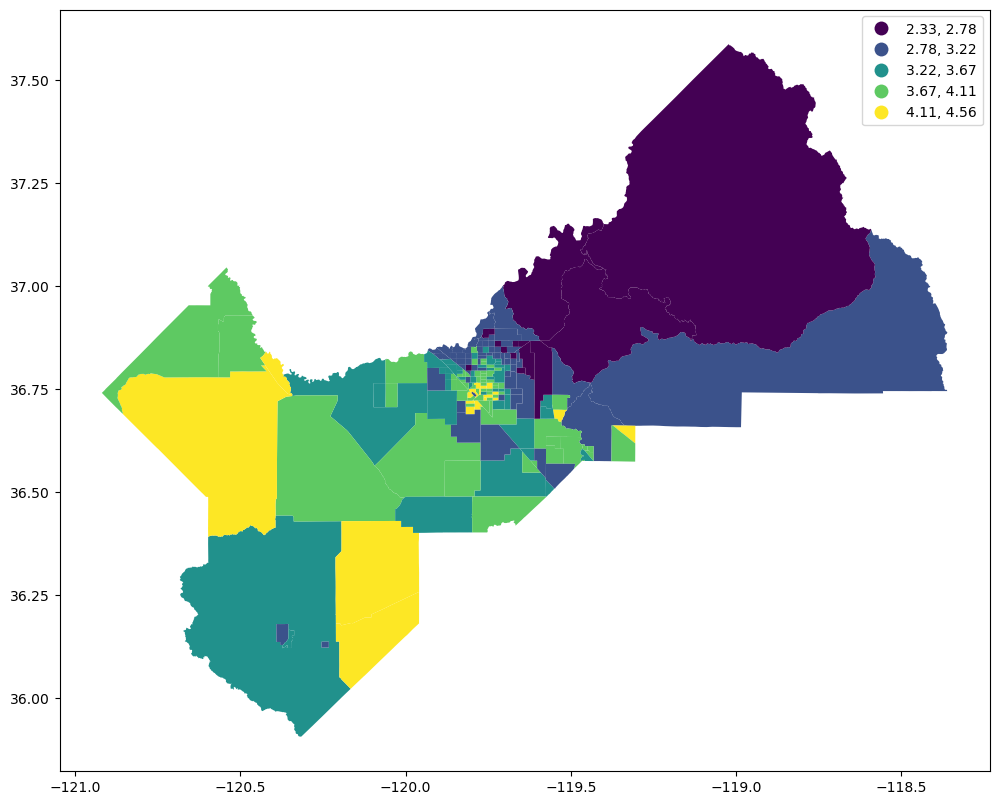

In [58]:
tracts_AQVI.plot(figsize=(12,10),
                 column='AQVIAC',
                 legend=True, 
                 scheme='equal_interval')

In [ ]:
tracts_AQVI.plot(figsize=(12,10),
                 column='WeightedAQVI',
                 legend=True, 
                 scheme='quantiles')

<div class="alert alert-info">

Now it's your turn! Create map plots based on other race indicators. Experiment with the different schemes to display variations of the same data, mapped differently.

</div>

## Additional mapping ideas
What does the majority ethnic cluster look like in Los Angeles?

In [60]:
tracts_AQVI[tracts_AQVI.AQVIAC < 3.5 ]

,FIPS,geometry,Tract,Geo_ID,Population,HVIExposure,HVISense,HVIAC,AQVIExposure,AQVISense,AQVIAC
3,06019005000,"MULTIPOLYGON (((-119.79955 36.79401, -119.7995...",50.00,6019005000,4548,3.5714,3.6667,3.2222,3.7778,3.6667,3.2222
4,06019005405,"MULTIPOLYGON (((-119.78133 36.82298, -119.7813...",54.05,6019005405,4693,3.2857,3.3333,3.1111,3.5556,3.3333,3.1111
5,06019005301,"MULTIPOLYGON (((-119.75423 36.80134, -119.7542...",53.01,6019005301,6018,3.5714,3.6667,3.2222,3.5556,3.6667,3.2222
6,06019005509,"MULTIPOLYGON (((-119.73613 36.83761, -119.7362...",55.09,6019005509,5128,3.4286,2.8333,3.0000,3.6667,2.8333,3.0000
7,06019004405,"MULTIPOLYGON (((-119.78392 36.85437, -119.7840...",44.05,6019004405,3663,3.1429,3.0000,2.7778,3.3333,3.0000,2.7778
8,06019005516,"MULTIPOLYGON (((-119.77948 36.86632, -119.7793...",55.16,6019005516,6180,3.1429,2.5000,2.8889,3.4444,2.5000,2.8889
9,06019005517,"MULTIPOLYGON (((-119.77064 36.87716, -119.7703...",55.17,6019005517,7978,3.1429,2.6667,2.4444,3.3333,2.6667,2.5556
10,06019004406,"MULTIPOLYGON (((-119.78122 36.83745, -119.7812...",44.06,6019004406,5328,3.7143,2.6667,2.7778,3.7778,2.6667,2.7778
11,06019005507,"MULTIPOLYGON (((-119.74778 36.86662, -119.7477...",55.07,6019005507,5503,3.4286,2.1667,2.7778,3.4444,2.1667,2.8889
18,06019005305,"MULTIPOLYGON (((-119.75423 36.80134, -119.7540...",53.05,6019005305,3648,3.8571,3.5000,3.3333,3.7778,3.5000,3.3333


In [ ]:
tracts_NoCanopy[tracts_NoCanopy.NoCanopy > .97].plot(figsize=(12,10),
                                             column='NoCanopy',
                                             legend=True, 
                                             scheme='NaturalBreaks')

In [ ]:
tracts_hvi[tracts_hvi.Weighted_HVI < 9].plot(figsize=(12,10),
                                             column='Weighted_HVI',
                                             legend=True, 
                                             scheme='NaturalBreaks')

In [ ]:
tracts_NoCanopy[tracts_NoCanopy.NoCanopy > .97].plot(figsize=(12,10),
                                             column='NoCanopy',
                                             legend=True, 
                                             scheme='NaturalBreaks')

## Folium



In [62]:
import folium

In [110]:
m = folium.Map(location=[36.6,-119.5], 
               zoom_start = 8.5,
               width = '100%',
                 height = '100%',
                 zoom_control=True,
               tiles='Stamen Toner')

# plot chorpleth over the base map
folium.Choropleth(
                  geo_data=tracts_AQVI, # geo data
                  data=tracts_AQVI, # data          
                  key_on='feature.properties.FIPS', # key, or merge column
                  columns=['FIPS', 'HVIAC'], # [key, value]
                  fill_color='YlGn',
                  line_weight=0.1, 
                  fill_opacity=0.5,
                  line_opacity=0.2, # line opacity (of the border)
                  legend_name='Heat Vulnerability Index: Adaptive Capacity').add_to(m)    # name on the legend color bar
m

In [102]:
m.save('HVIAC.html')

In [111]:
import io
from PIL import Image

img_data = m._to_png(5)
img = Image.open(io.BytesIO(img_data))
img.save('HVIAC.png')

ModuleNotFoundError: No module named 'selenium'